In [2]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [3]:
ds1 = pd.read_csv('./dataset/oct2018_reviews.csv', encoding='Latin-1')
ds2 = pd.read_csv('./dataset/nov2018_reviews.csv', encoding='Latin-1')
ds3 = pd.read_csv('./dataset/dec2018_reviews.csv', encoding='Latin-1')

#train = pd.read_csv('./dataset/oct2018_reviews.csv', encoding='Latin-1')
train = pd.concat([ds1, ds2, ds3])
test = pd.read_csv('./dataset/testreviews.csv', encoding='Latin-1')

In [4]:
train.head()
test.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,2515,198,2008-10-13,2603,Jenny,Stephanie was a wonderful host! Her apartment ...
1,2515,859,2009-03-08,8455,Roland,Such a wonderful place and very close to the m...
2,2515,1083,2009-03-25,9759,Cem,I just got back from a trip to NYC during whic...
3,2515,1107,2009-03-27,9193,Holly,Stephanie's offered all the most important thi...
4,2515,2175,2009-05-09,7048,Alessandra,"Stephanie was really nice, ftiendly and helpfu..."


# Column Values

In [62]:
list(train)

['listing_id', 'id', 'date', 'reviewer_id', 'reviewer_name', 'comments']

# Drop unnecessary columns

In [5]:
train = train.drop(columns = ['date', 'id', 'reviewer_id', 'reviewer_name'])
test = test.drop(columns = ['date', 'id', 'reviewer_id', 'reviewer_name'])

# Data Cleaning

## Remove punctuations, special characters, 

In [6]:
train.comments

0          Stephanie was a wonderful host! Her apartment ...
1          Such a wonderful place and very close to the m...
2          I just got back from a trip to NYC during whic...
3          Stephanie's offered all the most important thi...
4          Stephanie was really nice, ftiendly and helpfu...
5          I was pleasantly surprised with my whole stay ...
6          Stephanie's apt was great. Very convenient to ...
7          my husband and i had such a great time staying...
8          When I first arrived at Stephanie's, she was v...
9                         awesome couldn't have been better.
10         It was a great week at "chez chic". Stephanie ...
11         My friend and I stayed at the Chez Chic for te...
12         Wonderful hostess, kind, willing to help and o...
13         Stephanie was the perfect host... welcoming an...
14         I was pleasantly surprised to see a clean room...
15         What a great location and welcome from Stephan...
16         Wow..It was o

In [7]:
train['clean_comments'] = train['comments'].str.replace("[^a-zA-Z#]", " ")
test['clean_comments'] = test['comments'].str.replace("[^a-zA-Z#]", " ")

In [8]:
train.clean_comments

0          Stephanie was a wonderful host  Her apartment ...
1          Such a wonderful place and very close to the m...
2          I just got back from a trip to NYC during whic...
3          Stephanie s offered all the most important thi...
4          Stephanie was really nice  ftiendly and helpfu...
5          I was pleasantly surprised with my whole stay ...
6          Stephanie s apt was great  Very convenient to ...
7          my husband and i had such a great time staying...
8          When I first arrived at Stephanie s  she was v...
9                         awesome couldn t have been better 
10         It was a great week at  chez chic   Stephanie ...
11         My friend and I stayed at the Chez Chic for te...
12         Wonderful hostess  kind  willing to help and o...
13         Stephanie was the perfect host    welcoming an...
14         I was pleasantly surprised to see a clean room...
15         What a great location and welcome from Stephan...
16         Wow  It was o

In [9]:
train.dtypes
train = train.astype({"clean_comments": object})
train.dtypes

listing_id         int64
comments          object
clean_comments    object
dtype: object

## Replace empty value with "Null" 
## Remove small words <=3 characters

In [10]:
train['clean_comments'] = train['clean_comments'].fillna("Null")
train['clean_comments'] = train['clean_comments'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [11]:
train.clean_comments

0          Stephanie wonderful host apartment beautiful e...
1          Such wonderful place very close metro station ...
2          just back from trip during which stayed Stepha...
3          Stephanie offered most important things warm w...
4          Stephanie really nice ftiendly helpful room pe...
5          pleasantly surprised with whole stay Stepahnie...
6          Stephanie great Very convenient anywhere would...
7          husband such great time staying with stephanie...
8          When first arrived Stephanie very welcoming pr...
9                            awesome couldn have been better
10         great week chez chic Stephanie family were rea...
11         friend stayed Chez Chic days Stephanie great h...
12         Wonderful hostess kind willing help offer advi...
13         Stephanie perfect host welcoming generous with...
14         pleasantly surprised clean room elegantly deco...
15         What great location welcome from Stephanie fam...
16         best trip eve

# Tokenization

In [ ]:
from nltk.tokenize import sent_tokenize

tokenized_comments = train['clean_comments'].apply(lambda x: x.split())

word_tokens = tokenized_comments.apply(lambda x: [sent_tokenize(i) for i in x])

# Lexicon Normalization

In [41]:
#considers a type of noise data that exists, which are related forms of a word to a root word

## Stemming (Remove suffixes)

In [71]:
#Stemmer works on an individual word without knowledge of the context

In [72]:
from nltk.stem.porter import *
from stemming.porter2 import stem

tokenized_comments = tokenized_comments.apply(lambda x: [stem(i) for i in x]) # stemming
tokenized_comments.head()

0    [Stephani, wonder, host, apart, beauti, extrem...
1    [Such, wonder, place, veri, close, metro, stat...
2    [just, back, from, trip, dure, which, stay, St...
3    [Stephani, offer, most, import, thing, warm, w...
4    [Stephani, realli, nice, ftiend, help, room, p...
Name: clean_comments, dtype: object

## Lemmatization

In [45]:
#Lemmatization reduces words to their base word

In [46]:
#Lexicon Normalization
#performing stemming and Lemmatization

from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import wordnet as wn
from nltk.stem.snowball import SnowballStemmer

lem = WordNetLemmatizer()
stemmer = SnowballStemmer("english")

#tokenized_comments = tokenized_comments.apply(lambda x: [for j in x [lem.lemmatize(i) for i in j]]) # lemmatizing
    
for word in tokenized_comments[0]:
    new_word = stemmer.stem(word)
    print(new_word)


stephani
wonder
host
apart
beauti
extrem
clean
veri
nice
afford
stay
citi
with
privat
room
bathroom


In [47]:
#stitch tokens back together

In [17]:
for i in range(len(tokenized_comments)):
    tokenized_comments[i] = ' '.join(tokenized_comments[i])

train['clean_comments'] = tokenized_comments

In [18]:
train.head()

,listing_id,comments,clean_comments
0,2515,Stephanie was a wonderful host! Her apartment ...,Stephani wonder host apart beauti extrem clean...
1,2515,Such a wonderful place and very close to the m...,Such wonder place veri close metro station lin...
2,2515,I just got back from a trip to NYC during whic...,just back from trip dure which stay Stephani a...
3,2515,Stephanie's offered all the most important thi...,Stephani offer most import thing warm welcom i...
4,2515,"Stephanie was really nice, ftiendly and helpfu...",Stephani realli nice ftiend help room perfect ...


# Story Generation

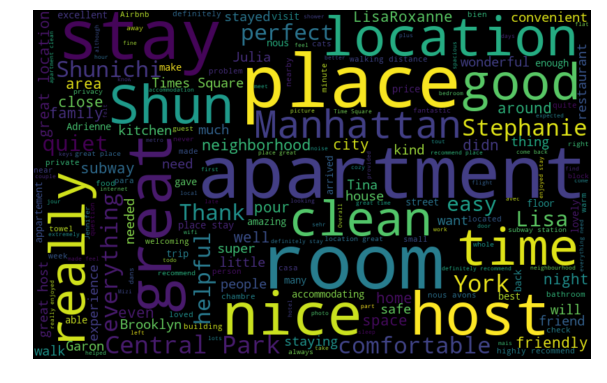

In [73]:
all_words = ' '.join([text for text in train['clean_comments']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# POS Tagging

In [74]:
import nltk

word_tokens.apply(lambda x: [nltk.pos_tag(i) for i in x])

0      [[(Stephanie, NN)], [(wonderful, NN)], [(host,...
1      [[(Such, JJ)], [(wonderful, NN)], [(place, NN)...
2      [[(just, RB)], [(back, RB)], [(from, IN)], [(t...
3      [[(Stephanie, NN)], [(offered, VBN)], [(most, ...
4      [[(Stephanie, NN)], [(really, RB)], [(nice, JJ...
5      [[(pleasantly, RB)], [(surprised, JJ)], [(with...
6      [[(Stephanie, NN)], [(great, JJ)], [(Very, RB)...
7      [[(husband, NN)], [(such, JJ)], [(great, JJ)],...
8      [[(When, WRB)], [(first, RB)], [(arrived, VBN)...
9      [[(awesome, NN)], [(couldn, NN)], [(have, VB)]...
10     [[(great, JJ)], [(week, NN)], [(chez, NN)], [(...
11     [[(friend, NN)], [(stayed, NN)], [(Chez, NN)],...
12     [[(Wonderful, JJ)], [(hostess, NN)], [(kind, N...
13     [[(Stephanie, NN)], [(perfect, NN)], [(host, N...
14     [[(pleasantly, RB)], [(surprised, JJ)], [(clea...
15     [[(What, WP)], [(great, JJ)], [(location, NN)]...
16     [[(best, JJS)], [(trip, NN)], [(ever, RB)], [(...
17     [[(Stephanie, NN)], [(su

In [13]:
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer

train[['negative', 'positive']] = train['clean_comments'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
train.head()

,listing_id,comments,clean_comments,negative,positive
0,2515,Stephanie was a wonderful host! Her apartment ...,Stephanie wonderful host apartment beautiful e...,0.599333,0.815000
1,2515,Such a wonderful place and very close to the m...,Such wonderful place very close metro station ...,0.361905,0.504762
2,2515,I just got back from a trip to NYC during whic...,just back from trip during which stayed Stepha...,0.174602,0.435032
3,2515,Stephanie's offered all the most important thi...,Stephanie offered most important things warm w...,0.350000,0.632639
4,2515,"Stephanie was really nice, ftiendly and helpfu...",Stephanie really nice ftiendly helpful room pe...,0.721111,1.000000


In [14]:
review_avg = train.drop(columns = ['comments', 'clean_comments'])
review_avg.head()

,listing_id,negative,positive
0,2515,0.599333,0.815000
1,2515,0.361905,0.504762
2,2515,0.174602,0.435032
3,2515,0.350000,0.632639
4,2515,0.721111,1.000000


## Group polarity scores and average

In [15]:
df_mean = review_avg.groupby(['listing_id'], as_index= False)[['positive','negative']].mean()
df_mean.head()
df_mean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45124 entries, 0 to 45123
Data columns (total 3 columns):
listing_id    45124 non-null int64
positive      45124 non-null float64
negative      45124 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.4 MB


In [16]:
ds4 = pd.read_csv('./dataset/airbnb_cleaned.csv', encoding='Latin-1')
ds4.head()

,Unnamed: 0,id,host_id,zipcode,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,beds,bed_type,price,number_of_reviews,review_scores_rating,availability_30,minimum_nights,bathrooms,host_is_superhost,host_response_rate
0,0,2515,2758,10026,Harlem,Apartment,1.01,3,1.0,2.0,1.00,59.0,173,93.0,10,2,1.0,0.0,0.0
1,1,2539,2787,11218,Kensington,Apartment,1.01,4,1.0,3.0,1.00,149.0,8,98.0,25,1,1.0,1.0,0.0
2,2,2595,2845,10018,Midtown,Apartment,1.00,2,0.0,1.0,1.00,225.0,36,94.0,20,1,1.0,0.0,80.0
3,3,3330,4177,11206,Williamsburg,Apartment,1.01,2,1.0,1.0,1.00,70.0,34,97.0,1,5,1.0,0.0,0.0
4,4,3647,4632,10027,Harlem,Apartment,1.01,2,1.0,1.0,1.02,150.0,0,NaN,30,3,1.0,0.0,50.0


## Merge to original dataframe

In [17]:
new_df = pd.merge(ds4, df_mean, left_on='id', right_on='listing_id', how='left').drop('listing_id', axis=1)
new_df.columns

Index(['Unnamed: 0', 'id', 'host_id', 'zipcode', 'neighbourhood_cleansed',
       'property_type', 'room_type', 'accommodates', 'bedrooms', 'beds',
       'bed_type', 'price', 'number_of_reviews', 'review_scores_rating',
       'availability_30', 'minimum_nights', 'bathrooms', 'host_is_superhost',
       'host_response_rate', 'positive', 'negative'],
      dtype='object')

In [27]:
new_df = pd.read_csv('./dataset/airbnb_with_sentiment.csv', encoding='Latin-1')

In [28]:
new_df.head()

,Unnamed: 0,Unnamed: 0.1,id,host_id,zipcode,neighbourhood_cleansed,property_type,room_type,accommodates,bedrooms,...,price,number_of_reviews,review_scores_rating,availability_30,minimum_nights,bathrooms,host_is_superhost,host_response_rate,positive,negative
0,0,0,2515,2758,10026,Harlem,Apartment,1.01,3,1.0,...,59.0,173,93.0,10,2,1.0,0.0,0.0,0.488144,0.303227
1,1,1,2539,2787,11218,Kensington,Apartment,1.01,4,1.0,...,149.0,8,98.0,25,1,1.0,1.0,0.0,0.600259,0.465383
2,2,2,2595,2845,10018,Midtown,Apartment,1.00,2,0.0,...,225.0,36,94.0,20,1,1.0,0.0,80.0,0.552056,0.352874
3,3,3,3330,4177,11206,Williamsburg,Apartment,1.01,2,1.0,...,70.0,34,97.0,1,5,1.0,0.0,0.0,0.577553,0.357564
4,4,4,3647,4632,10027,Harlem,Apartment,1.01,2,1.0,...,150.0,0,NaN,30,3,1.0,0.0,50.0,NaN,NaN


In [33]:
new_df = new_df.dropna()

In [38]:
new_df.head()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,Unnamed: 0.1.1.1,id,host_id,zipcode,neighbourhood_cleansed,property_type,room_type,...,price,number_of_reviews,review_scores_rating,availability_30,minimum_nights,bathrooms,host_is_superhost,host_response_rate,positive,negative
0,0,0,0,0,2515,2758,10026,Harlem,Apartment,1.01,...,59.0,173,93.0,10,2,1.0,0.0,0.0,0.488144,0.303227
1,1,1,1,1,2539,2787,11218,Kensington,Apartment,1.01,...,149.0,8,98.0,25,1,1.0,1.0,0.0,0.600259,0.465383
2,2,2,2,2,2595,2845,10018,Midtown,Apartment,1.00,...,225.0,36,94.0,20,1,1.0,0.0,80.0,0.552056,0.352874
3,3,3,3,3,3330,4177,11206,Williamsburg,Apartment,1.01,...,70.0,34,97.0,1,5,1.0,0.0,0.0,0.577553,0.357564
4,5,5,5,5,3831,4869,11238,Clinton Hill,Guest suite,1.00,...,89.0,213,91.0,0,1,1.0,0.0,100.0,0.543768,0.350448
